In [2]:
%matplotlib inline

In [3]:
%pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.



# NeuroImaging volumes visualization

Simple example to show Nifti data visualization.


## Fetch data



In [4]:
from nilearn import datasets

# By default 2nd subject will be fetched
haxby_dataset = datasets.fetch_haxby()

# print basic information on the dataset
print('First anatomical nifti image (3D) located is at: %s' %
      haxby_dataset.anat[0])
print('First functional nifti image (4D) is located at: %s' %
      haxby_dataset.func[0])


Dataset created in /Users/anushmutyala/nilearn_data/haxby2001



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


Downloaded 283787264 of 291168628 bytes (97.5%,    1.2s remaining) ...done. (48 seconds, 0 min)
Extracting data from /Users/anushmutyala/nilearn_data/haxby2001/def37a305edfda829916fa14c9ea08f8/subj2-2010.01.14.tar.gz...

First anatomical nifti image (3D) located is at: /Users/anushmutyala/nilearn_data/haxby2001/subj2/anat.nii.gz
First functional nifti image (4D) is located at: /Users/anushmutyala/nilearn_data/haxby2001/subj2/bold.nii.gz


.. done.


In [5]:
haxby_dataset

{'anat': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/anat.nii.gz'],
 'func': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/bold.nii.gz'],
 'session_target': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/labels.txt'],
 'mask_vt': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz'],
 'mask_face': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/mask8b_face_vt.nii.gz'],
 'mask_house': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/mask8b_house_vt.nii.gz'],
 'mask_face_little': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/mask8_face_vt.nii.gz'],
 'mask_house_little': ['/Users/anushmutyala/nilearn_data/haxby2001/subj2/mask8_house_vt.nii.gz'],
 'mask': '/Users/anushmutyala/nilearn_data/haxby2001/mask.nii.gz',
 'description': 'Haxby 2001 results\n\n\nNotes\n-----\nResults from a classical fMRI study that investigated the differences between\nthe neural correlates of face versus object processing in the ventral visual\nstream. Face and object stimu

## Visualization



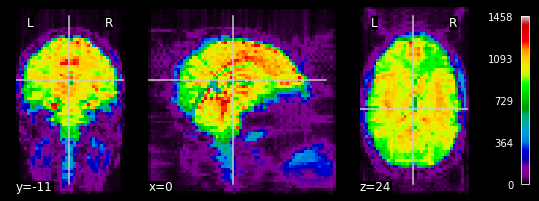

In [6]:
from nilearn.image.image import mean_img

# Compute the mean EPI: we do the mean along the axis 3, which is time
func_filename = haxby_dataset.func[0]
mean_haxby = mean_img(func_filename)

from nilearn.plotting import plot_epi, show
plot_epi(mean_haxby, colorbar=True, cbar_tick_format="%i")

## Extracting a brain mask
Simple computation of a mask from the fMRI data



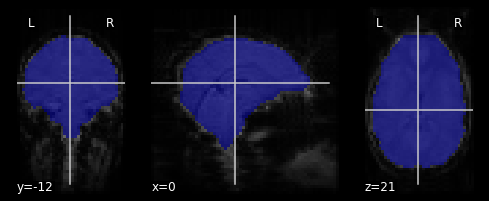

In [7]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(func_filename)

# Visualize it as an ROI
from nilearn.plotting import plot_roi
plot_roi(mask_img, mean_haxby)

## Applying the mask to extract the corresponding time series



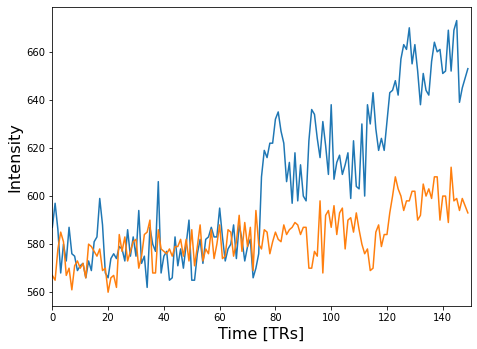

In [8]:
from nilearn.masking import apply_mask
masked_data = apply_mask(func_filename, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels

# And now plot a few of these
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:150, :2])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

show()